##### **<font color='purple'>Image Processing Assignment: Edge Detection</font>**
##### **<font color='purple'>Student Name: Lina Abureesh</font>**
##### **<font color='purple'>University ID: 1211985</font>**

#### Import Libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy 

#### Load the images

In [2]:
dome_of_rock_img = cv.imread('the Dome of the Rock.jpg')
cat_img = cv.imread('cats.jpg')
flower_img = cv.imread('flowers.jpg')

#### Convert colors to RGB

In [3]:
dome_of_rock_img = cv.cvtColor(dome_of_rock_img, cv.COLOR_BGR2RGB)
cat_img = cv.cvtColor(cat_img, cv.COLOR_BGR2RGB)
flower_img = cv.cvtColor(flower_img, cv.COLOR_BGR2RGB)

#### Show the images

Text(0.5, 1.0, 'Flower')

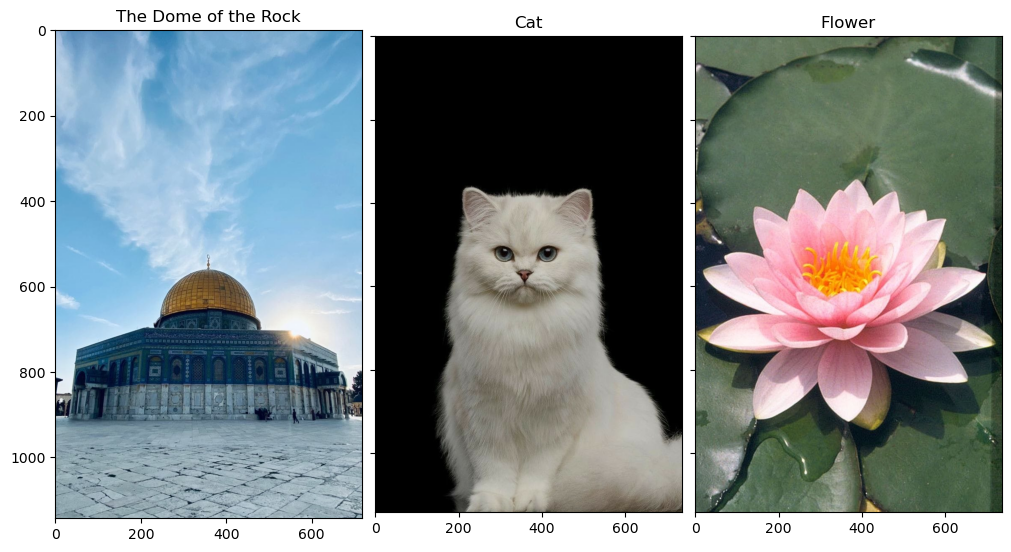

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10), sharey=True, constrained_layout=True)
axes[0].imshow(dome_of_rock_img)
axes[0].set_title("The Dome of the Rock")
axes[1].imshow(cat_img)
axes[1].set_title("Cat")
axes[2].imshow(flower_img)
axes[2].set_title("Flower")

#### Color to Grayscale Conversion: 

In [5]:
dome_of_rock_img = cv.cvtColor(dome_of_rock_img, cv.COLOR_RGB2GRAY) 
cat_img = cv.cvtColor(cat_img, cv.COLOR_RGB2GRAY) 
flower_img = cv.cvtColor(flower_img, cv.COLOR_RGB2GRAY) 

#### Show gray images:

Text(0.5, 1.0, 'Flower')

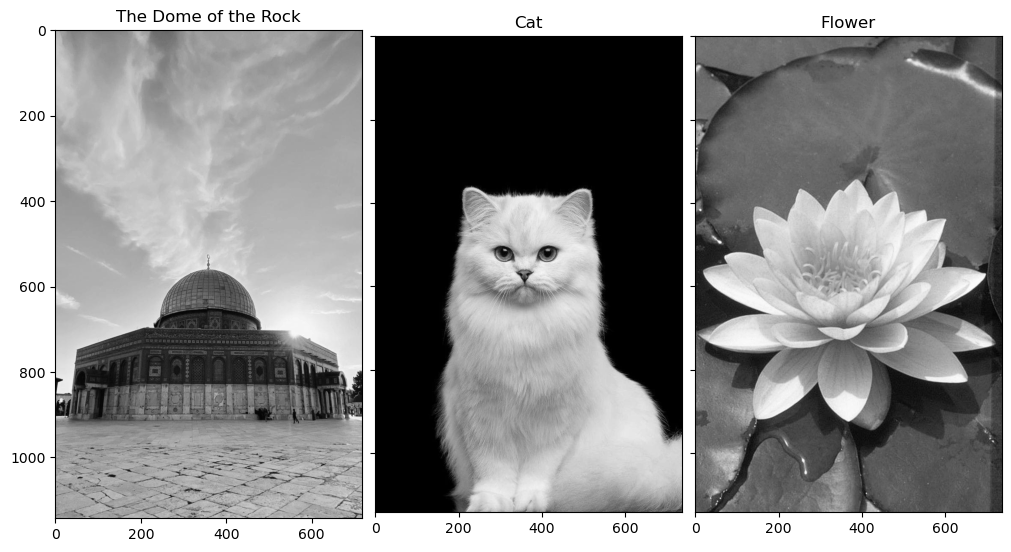

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10), sharey=True, constrained_layout=True)
axes[0].imshow(dome_of_rock_img, cmap='gray')
axes[0].set_title("The Dome of the Rock")
axes[1].imshow(cat_img, cmap='gray')
axes[1].set_title("Cat")
axes[2].imshow(flower_img, cmap='gray')
axes[2].set_title("Flower")

##### Save the gray images

In [7]:
cv.imwrite('dome_of_rock_img_gray.jpg', dome_of_rock_img)
cv.imwrite('cat_img_gray.jpg', cat_img)
cv.imwrite('flower_img_gray.jpg', flower_img)

True

#### Padding images with zeros:

In [8]:
def pad_img(img):
    padded_img = copy.deepcopy(img)
    zeros_for_column = []    
    for i in range(img.shape[0]):
        zeros_for_column.append([0])

    column_to_be_added = np.array(zeros_for_column)
    padded_img = np.append(padded_img, column_to_be_added, axis=1)
    # padded_img = np.insert(padded_img, 0, column_to_be_added, axis=1)
    padded_img = np.concatenate([column_to_be_added,padded_img], axis=1)
    row_to_be_added = np.zeros(padded_img.shape[1])
    padded_img = np.append(padded_img, [row_to_be_added], axis=0)
    padded_img = np.insert(padded_img, 0, [row_to_be_added], axis=0)

    return padded_img    

In [9]:
padded_dome_of_rock_img = pad_img(dome_of_rock_img)
padded_cat_img = pad_img(cat_img)
padded_flower_img = pad_img(flower_img)

In [10]:
dome_of_rock_img

array([[164, 163, 164, ..., 125, 125, 125],
       [169, 168, 167, ..., 127, 126, 126],
       [174, 172, 171, ..., 128, 127, 126],
       ...,
       [136, 138, 139, ..., 119,  78,  51],
       [136, 137, 135, ...,  67,  70,  74],
       [134, 126, 128, ...,  35,  63,  92]], dtype=uint8)

In [11]:
padded_dome_of_rock_img

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 164., 163., ..., 125., 125.,   0.],
       [  0., 169., 168., ..., 126., 126.,   0.],
       ...,
       [  0., 136., 137., ...,  70.,  74.,   0.],
       [  0., 134., 126., ...,  63.,  92.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

#### Smoothing

In [12]:
def averageFiltering(padded_img):
    filtered_img = np.zeros_like(padded_img)
    for i in range(1, padded_img.shape[0] - 1):
        for j in range(1, padded_img.shape[1] - 1):
            filtered_img[i][j] = compute_avg(i, j, padded_img)
    return filtered_img    

In [13]:
def compute_avg(i,j, img):
    sum = 0 
    sum += img[i][j] 
    sum += img[i][j-1] 
    sum += img[i][j+1] 
    sum += img[i-1][j] 
    sum += img[i+1][j] 
    sum += img[i+1][j+1] + img[i-1][j-1] + img[i-1][j+1] + img[i+1][j-1]
    return int(sum/9)

In [14]:
filtered_dome_of_rock_img = averageFiltering(padded_dome_of_rock_img)
filtered_cat_img = averageFiltering(padded_cat_img)
filtered_flower_img = averageFiltering(padded_flower_img)

#### Apply Edge Detection Algorithms 

* #### <font color='green'>Roberts Operator: </font>

In [15]:
def threshold_img(img, threshold):
    new_img = copy.deepcopy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] >= threshold or img[i][j] <= -threshold: 
                new_img[i][j] = 255
            else:
                new_img[i][j] = 0
    return new_img

In [16]:
def calculate_roberts(img, threshold):
    roberts_img = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0] - 1):
        for j in range(img.shape[1] - 1):
            roberts_img[i][j] = img[i][j] - img[i+1][j+1] + img[i+1][j] - img[i][j+1]
    roberts_img = threshold_img(roberts_img, threshold)
    return roberts_img

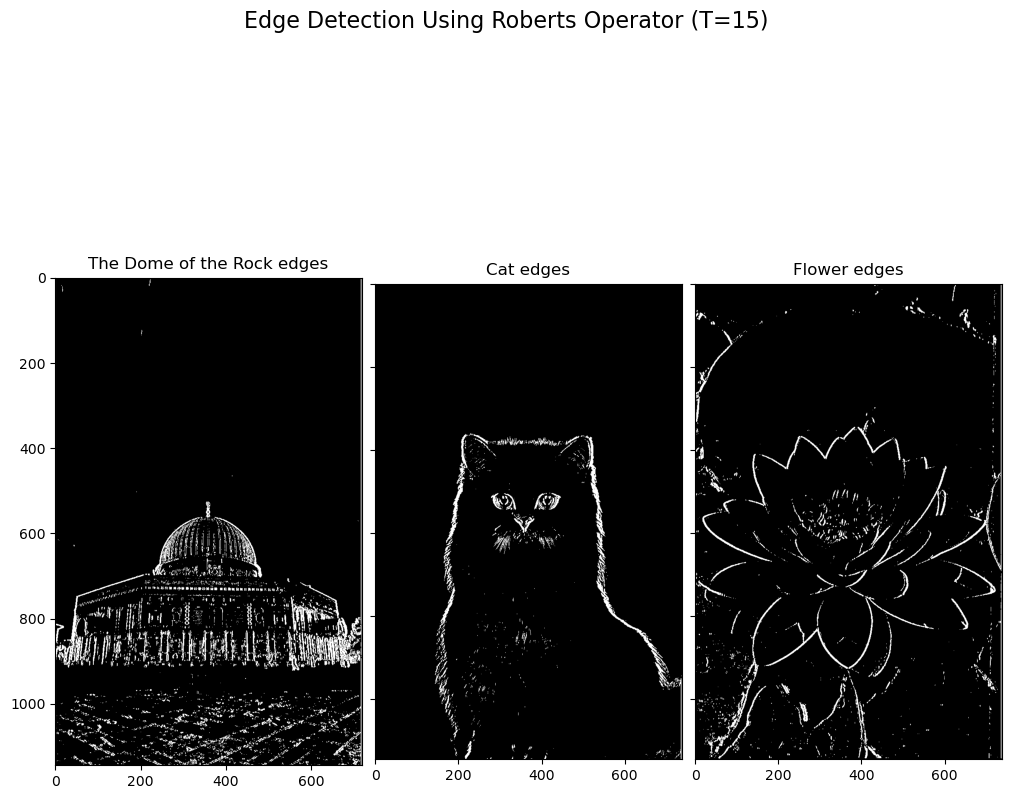

In [17]:
threshold = 15
roberts_dom = calculate_roberts(filtered_dome_of_rock_img, threshold)
roberts_cat = calculate_roberts(filtered_cat_img, threshold)
roberts_flower = calculate_roberts(filtered_flower_img, threshold)
fig, ax = plt.subplots(1, 3, figsize=(10, 10), sharey=True, constrained_layout=True)
fig.suptitle(f'Edge Detection Using Roberts Operator (T={threshold})', fontsize=16)
ax[0].imshow(roberts_dom, cmap='gray')
ax[0].set_title("The Dome of the Rock edges")
ax[1].imshow(roberts_cat, cmap='gray')
ax[1].set_title("Cat edges")
ax[2].imshow(roberts_flower, cmap='gray')
ax[2].set_title("Flower edges")
plt.show()

* #### <font color='green'>Sobel Operator: </font>

In [18]:
def calculate_sobel(img, threshold):
    sobel_img = np.zeros_like(img)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            g_x = calc_g_x(img[i-1][j+1], img[i][j+1], img[i+1][j+1], img[i+1][j-1], img[i][j-1], img[i-1][j-1], 2)
            g_y = calc_g_y(img[i-1][j-1], img[i-1][j], img[i-1][j+1], img[i+1][j+1], img[i+1][j], img[i+1][j-1], 2)
            sobel_img[i][j] = np.sqrt(np.square(g_x) + np.square(g_y))
    sobel_img = threshold_img(sobel_img, threshold)
    return sobel_img

In [19]:
# this function is used only in sobel and prewitt operators where c = 2 in sobel and 1 in prewitt
def calc_g_x(a2, a3, a4, a6, a7, a0, c):
    g_x = (a2 + c*a3 + a4) - (a6 + c*a7 + a0)
    return g_x

In [20]:
# this function is used only in sobel and prewitt operators where c = 2 in sobel and 1 in prewitt
def calc_g_y(a0, a1, a2, a4, a5, a6, c):
    g_y = (a0 + c*a1 + a2) - (a4 + c*a5 + a6)
    return g_y

Text(0.5, 1.0, 'Flower edges')

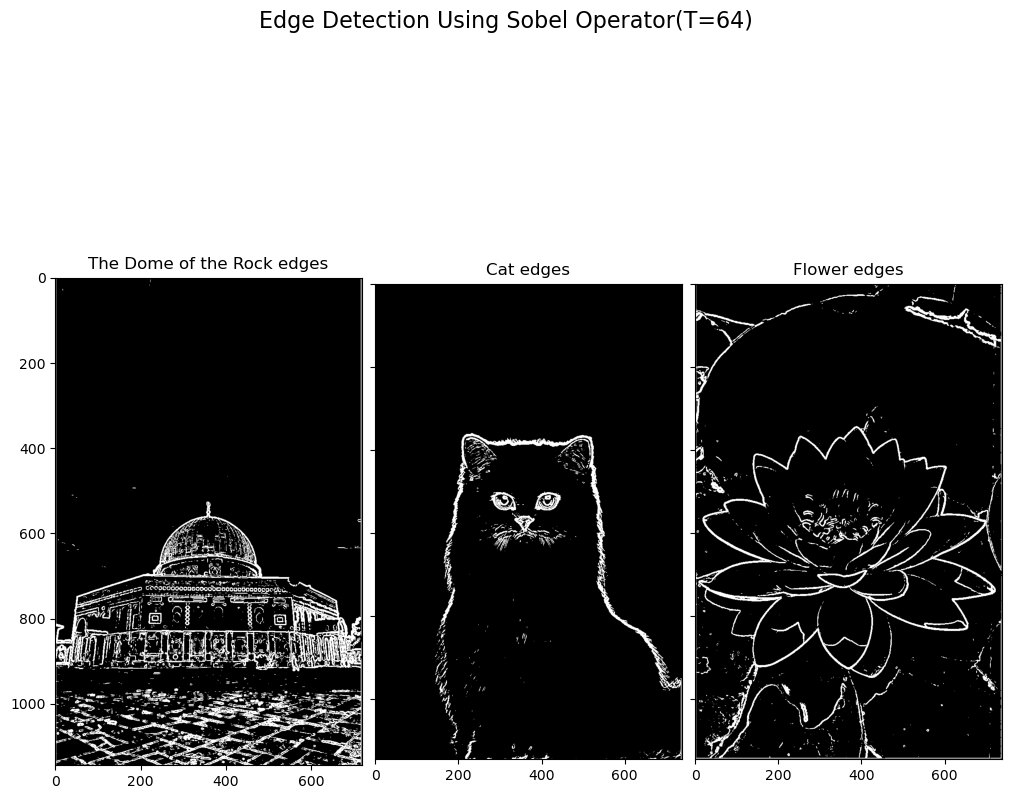

In [21]:
threshold = 64
sobel_dom = calculate_sobel(filtered_dome_of_rock_img, threshold)
sobel_cat = calculate_sobel(filtered_cat_img, threshold)
sobel_flower = calculate_sobel(filtered_flower_img, threshold)
fig, ax = plt.subplots(1, 3, figsize=(10, 10), sharey=True, constrained_layout=True)
fig.suptitle(f'Edge Detection Using Sobel Operator(T={threshold})', fontsize=16)
ax[0].imshow(sobel_dom, cmap='gray')
ax[0].set_title("The Dome of the Rock edges")
ax[1].imshow(sobel_cat, cmap='gray')
ax[1].set_title("Cat edges")
ax[2].imshow(sobel_flower, cmap='gray')
ax[2].set_title("Flower edges")

* #### <font color='green'>Prewitt Operator: </font>

In [22]:
def calculate_prewitt(img, threshold):
    prewitt_img = np.zeros_like(img)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            g_x = calc_g_x(img[i-1][j+1], img[i][j+1], img[i+1][j+1], img[i+1][j-1], img[i][j-1], img[i-1][j-1], 1)
            g_y = calc_g_y(img[i-1][j-1], img[i-1][j], img[i-1][j+1], img[i+1][j+1], img[i+1][j], img[i+1][j-1], 1)
            prewitt_img[i][j] =  np.sqrt(np.square(g_x) + np.square(g_y))
    prewitt_img = threshold_img(prewitt_img, threshold)
    return prewitt_img

Text(0.5, 1.0, 'Flower edges')

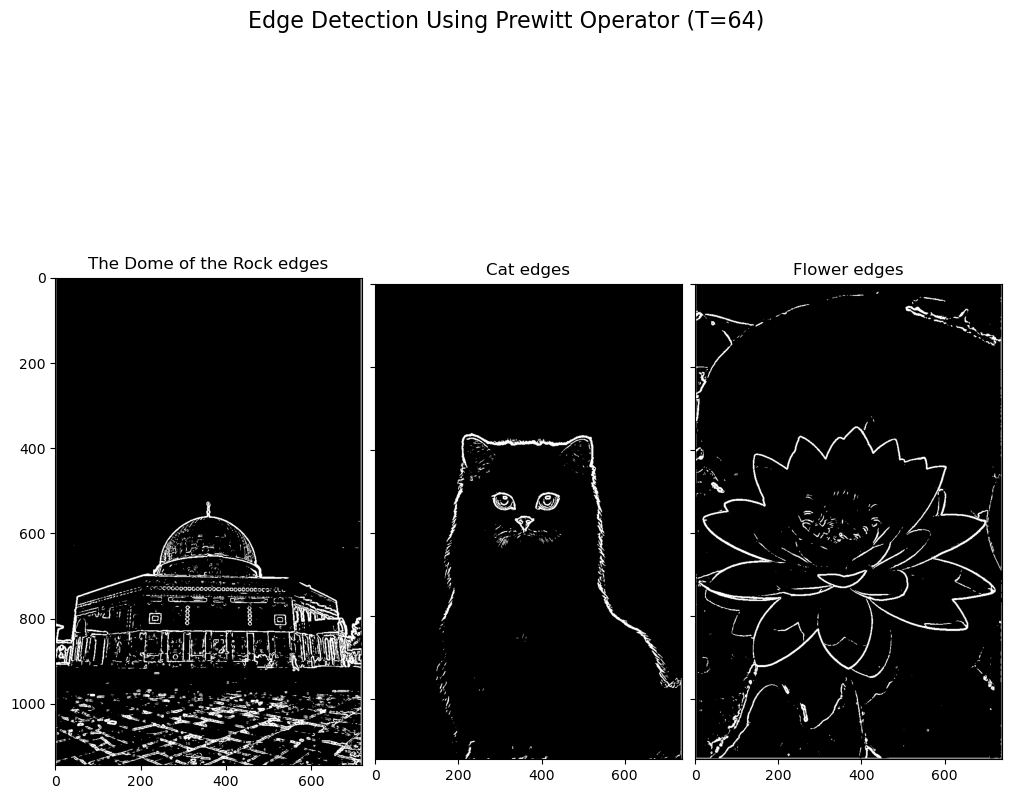

In [23]:
threshold = 64
prewitt_dom = calculate_prewitt(filtered_dome_of_rock_img, threshold)
prewitt_cat = calculate_prewitt(filtered_cat_img, threshold)
prewitt_flower = calculate_prewitt(filtered_flower_img, threshold)
fig, ax = plt.subplots(1, 3, figsize=(10, 10), sharey=True, constrained_layout=True)
fig.suptitle(f'Edge Detection Using Prewitt Operator (T={threshold})', fontsize=16)
ax[0].imshow(prewitt_dom, cmap='gray')
ax[0].set_title("The Dome of the Rock edges")
ax[1].imshow(prewitt_cat, cmap='gray')
ax[1].set_title("Cat edges")
ax[2].imshow(prewitt_flower, cmap='gray')
ax[2].set_title("Flower edges")

#### Manually Marked Edges

In [24]:
# read images
edged_cat_img = cv.imread('edged cat.jpg')
edged_flower_img = cv.imread('edged flower.jpg')
edged_dome_of_the_rock_img = cv.imread('edged dome.jpg')

In [25]:
# convert from bgr to rgb
edged_cat_img = cv.cvtColor(edged_cat_img, cv.COLOR_BGR2RGB)
edged_flower_img = cv.cvtColor(edged_flower_img, cv.COLOR_BGR2RGB)
edged_dome_of_the_rock_img = cv.cvtColor(edged_dome_of_the_rock_img, cv.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Flower')

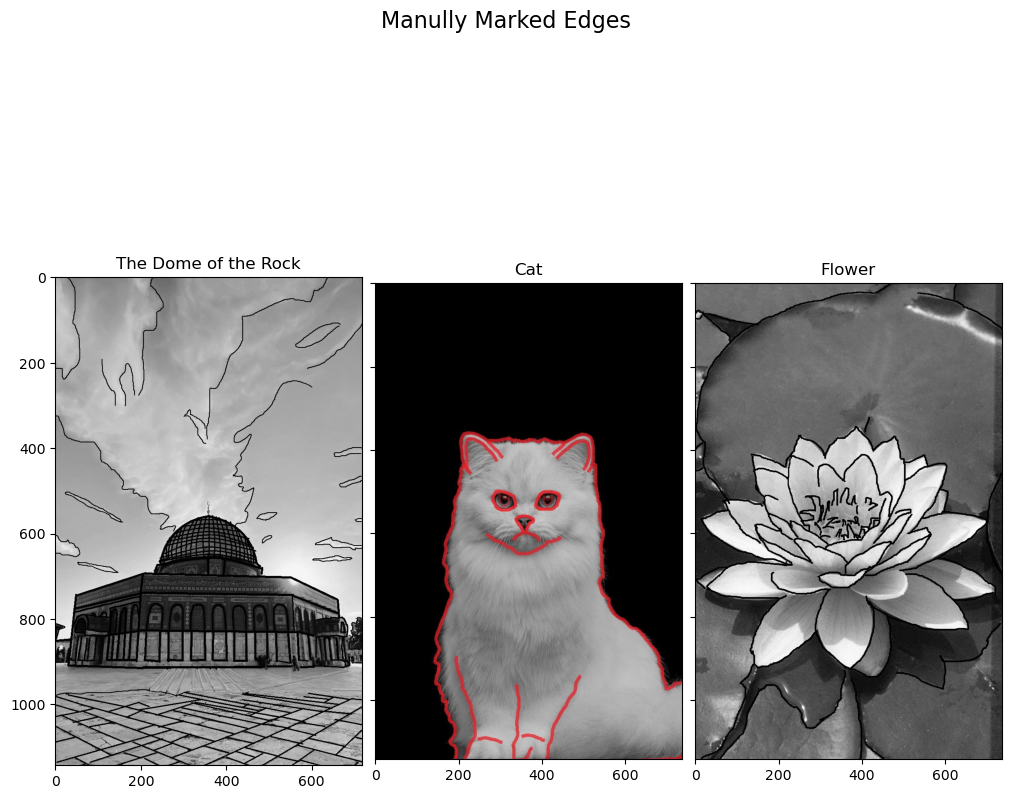

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10), sharey=True, constrained_layout=True)
fig.suptitle('Manully Marked Edges', fontsize=16)
axes[0].imshow(edged_dome_of_the_rock_img)
axes[0].set_title("The Dome of the Rock")
axes[1].imshow(edged_cat_img)
axes[1].set_title("Cat")
axes[2].imshow(edged_flower_img)
axes[2].set_title("Flower")

#### Comparison

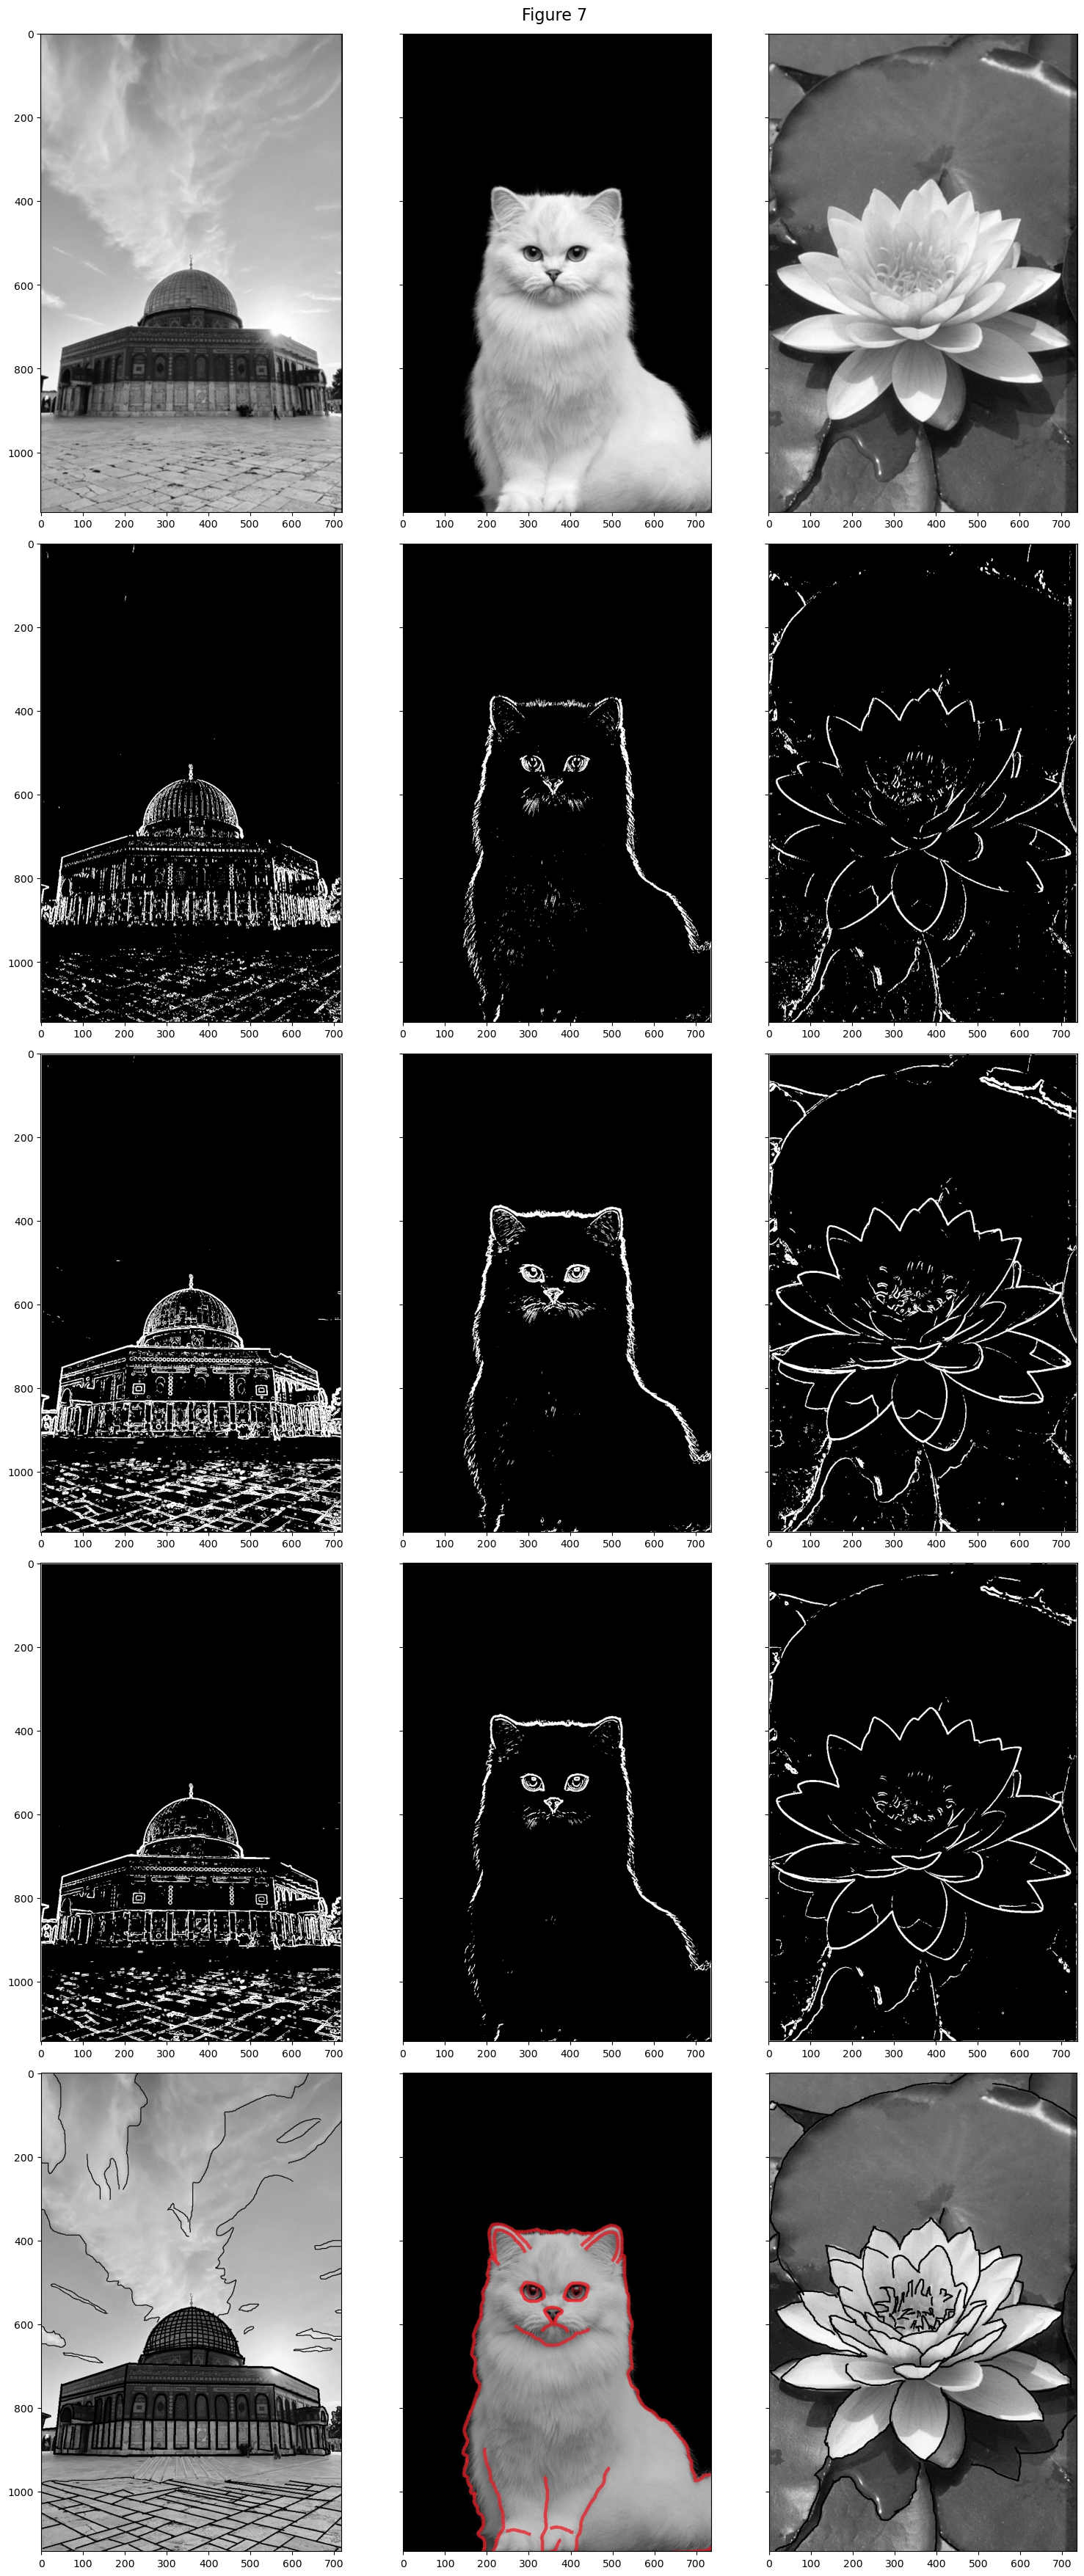

In [27]:
fig, ax = plt.subplots(5, 3, sharey=True, figsize=(15, 35), constrained_layout=True)
fig.suptitle('Figure 7', fontsize=16)
ax[0][0].imshow(filtered_dome_of_rock_img, cmap='gray')
ax[0][1].imshow(filtered_cat_img, cmap='gray')
ax[0][2].imshow(filtered_flower_img, cmap='gray')
ax[1][0].imshow(roberts_dom, cmap='gray')
ax[1][1].imshow(roberts_cat, cmap='gray')
ax[1][2].imshow(roberts_flower, cmap='gray')
ax[2][0].imshow(sobel_dom, cmap='gray')
ax[2][1].imshow(sobel_cat, cmap='gray')
ax[2][2].imshow(sobel_flower, cmap='gray')
ax[3][0].imshow(prewitt_dom, cmap='gray')
ax[3][1].imshow(prewitt_cat, cmap='gray')
ax[3][2].imshow(prewitt_flower, cmap='gray')
ax[4][0].imshow(edged_dome_of_the_rock_img, cmap='gray')
ax[4][1].imshow(edged_cat_img, cmap='gray')
ax[4][2].imshow(edged_flower_img, cmap='gray')

##### <font color='blue'>_Figure 7:_</font>
##### <font color='blue'>_Row #1 shows the original filtered images_</font>
##### <font color='blue'>_Row #2 shows the edges as detected using Roberts Operator at threshold value = 15_</font>
##### <font color='blue'>_Row #3 shows the edges as detected using Sobel Operator at threshold value = 64_</font>
##### <font color='blue'>_Row #4 shows the edges as detected using Prewitt Operator at threshold value = 64_</font>
##### <font color='blue'>_Row #5 shows the edges as detected manually_</font>

#### Results' Evaluation

#### <font color='red'>Are the detected edges close to where you expected them?</font>

##### When appropriate threshold values are chosen for each operator, the detected edges will be more close to expected

#### <font color='red'>Can adjusting the threshold value in the detection step improve the results?</font>

##### Adjusting the threshold value can apparently improve the results to some degree that differs according to the type of the operator that was used, as shown below: 

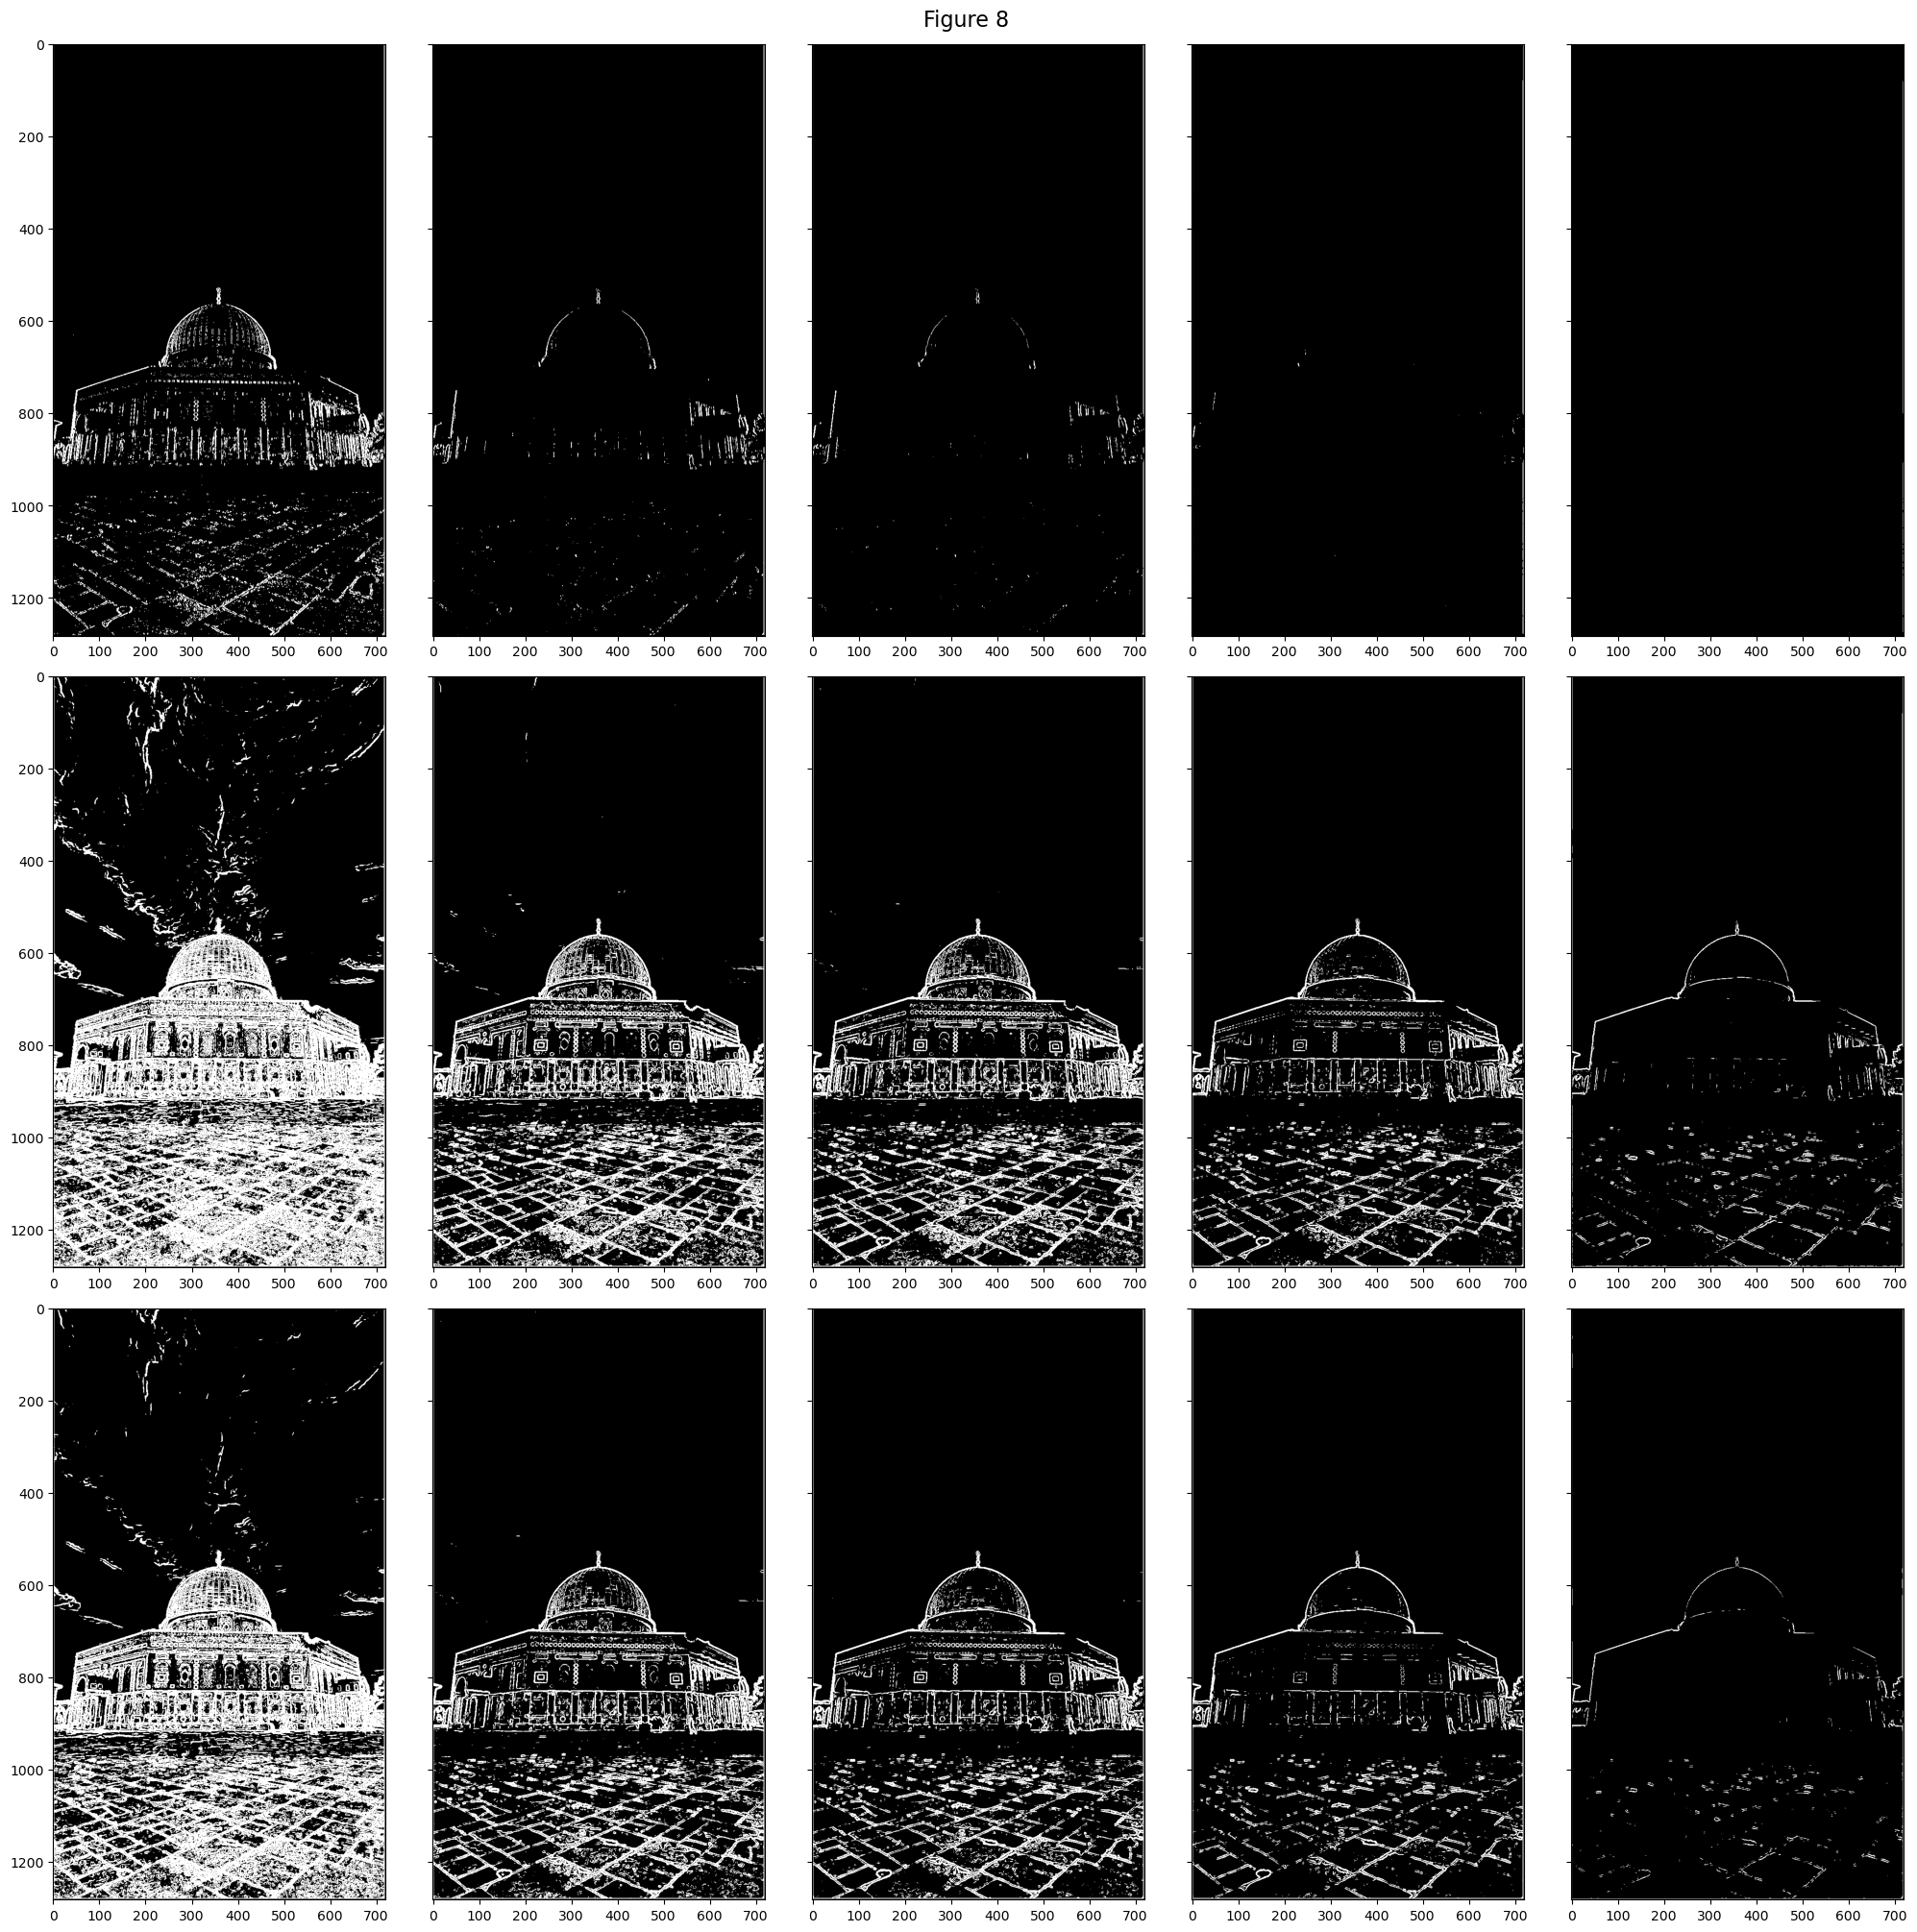

In [28]:
fig, ax = plt.subplots(3, 5, sharey=True, figsize=(20, 20), constrained_layout=True)
fig.suptitle('Figure 8', fontsize=16)
ax[0][0].imshow(calculate_roberts(filtered_dome_of_rock_img, 20), cmap='gray')
ax[0][1].imshow(calculate_roberts(filtered_dome_of_rock_img, 50), cmap='gray')
ax[0][2].imshow(calculate_roberts(filtered_dome_of_rock_img, 64), cmap='gray')
ax[0][3].imshow(calculate_roberts(filtered_dome_of_rock_img, 100), cmap='gray')
ax[0][4].imshow(calculate_roberts(filtered_dome_of_rock_img, 200), cmap='gray')
ax[1][0].imshow(calculate_sobel(filtered_dome_of_rock_img, 20), cmap='gray')
ax[1][1].imshow(calculate_sobel(filtered_dome_of_rock_img, 50), cmap='gray')
ax[1][2].imshow(calculate_sobel(filtered_dome_of_rock_img, 64), cmap='gray')
ax[1][3].imshow(calculate_sobel(filtered_dome_of_rock_img, 100), cmap='gray')
ax[1][4].imshow(calculate_sobel(filtered_dome_of_rock_img, 200), cmap='gray')
ax[2][0].imshow(calculate_prewitt(filtered_dome_of_rock_img, 20), cmap='gray')
ax[2][1].imshow(calculate_prewitt(filtered_dome_of_rock_img, 50), cmap='gray')
ax[2][2].imshow(calculate_prewitt(filtered_dome_of_rock_img, 64), cmap='gray')
ax[2][3].imshow(calculate_prewitt(filtered_dome_of_rock_img, 100), cmap='gray')
ax[2][4].imshow(calculate_prewitt(filtered_dome_of_rock_img, 200), cmap='gray')

##### <font color='blue'>Figure 8: Edge Detection using Roberts, Sobel and Prewitt operators -from up to down, respectively- with different threshold values: 20, 50, 64, 100 and 200, from left to right, respectively.</font>